| Problem | Formula|Search Domain|
|---      |----    |----|
|LTDZ1 |${\text{Maximum}}={\begin{cases}f_{1}\left(x_1,x_2,x_3\right)=3-(1+x_3)cos(x_1\pi/2)cos(x_2\pi/2)\\f_{2}\left(x_1,x_2,x_3\right)=3-(1+x_3)cos(x_1\pi/2)sin(x_2\pi/2)\\f_{3}\left(x_1,x_3\right)=3-(1+x_3)sin(x_1\pi/2)\end{cases}}$|$0\leq{x_1,x_2,x_3}\leq1$|

In [3]:
import time 
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images

ref_point = None
pf = None
def calculate_hv(result):
    path = os.path.join(os.path.dirname(os.getcwd()),result['path'])
    F = np.loadtxt(path)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    igd_plus = get_performance_indicator("igd+", pf)
    start_time = time.time()
    hv = metric.do(F)
    igd_plus = igd_plus.do(F)
    exc_time = time.time() - start_time
    return [hv,igd_plus,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['hv','igd_plus','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)
    output_result = final_result[['Problem', 'Alg_name', 'Evaluations','Iteration', 'Objectives', 'n_variables','pop_size',"solutions_shape",
    'exec_time', 'hv','igd_plus',
    'hv_exc_time']]
    print(f'ref_point is {ref_point}')
    print(f'pf shape is {pf.shape}')
    output_result = output_result.sort_values(['hv','igd_plus'],ascending =False).reset_index(drop=True)
    return output_result
cdir =os.getcwd()
pd.set_option('display.float_format', lambda x : "%.7f" % x)

# LTDZ1 problem 
## - (#variables / #objectives)

 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`

In [4]:
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 

pd.set_option('display.max_rows', None)
folder = os.path.dirname(os.getcwd())
filename = 'result_5NOV'
path = os.path.join(folder, filename)

result = pd.read_csv(path)


result.loc[:,'path'] = result['path'].str[29:].values
result.loc[:,'image_location'] = result['image_location'].str[29:].values
result.loc[:,'approx_nadir'] = result['approx_nadir'].str[1:-1].values
result = result.drop(columns=['xl','xu'])
ltdz1 = result.loc[result['Problem']=='LTDZ1'].reset_index(drop=True)
print(f"The number of records {len(ltdz1)}")

The number of records 48


In [5]:
#path and image path indicating location of objective file and visualization file
ltdz1.iloc[:,-2:].head(5)

,path,image_location
0,LTDZ1/NSGA2_LTDZ1_3/LTDZ1_NSGA2_Iteration-100_...,Images/LTDZ1/NSGA2_LTDZ1Var-3/LTDZ1_NSGA2_Iter...
1,LTDZ1/NSGA2_LTDZ1_3/LTDZ1_NSGA2_Iteration-100_...,Images/LTDZ1/NSGA2_LTDZ1Var-3/LTDZ1_NSGA2_Iter...
2,LTDZ1/NSGA2_LTDZ1_3/LTDZ1_NSGA2_Iteration-200_...,Images/LTDZ1/NSGA2_LTDZ1Var-3/LTDZ1_NSGA2_Iter...
3,LTDZ1/NSGA2_LTDZ1_3/LTDZ1_NSGA2_Iteration-100_...,Images/LTDZ1/NSGA2_LTDZ1Var-3/LTDZ1_NSGA2_Iter...
4,LTDZ1/NSGA3_LTDZ1_3/LTDZ1_NSGA3_Iteration-200_...,Images/LTDZ1/NSGA3_LTDZ1Var-3/LTDZ1_NSGA3_Iter...


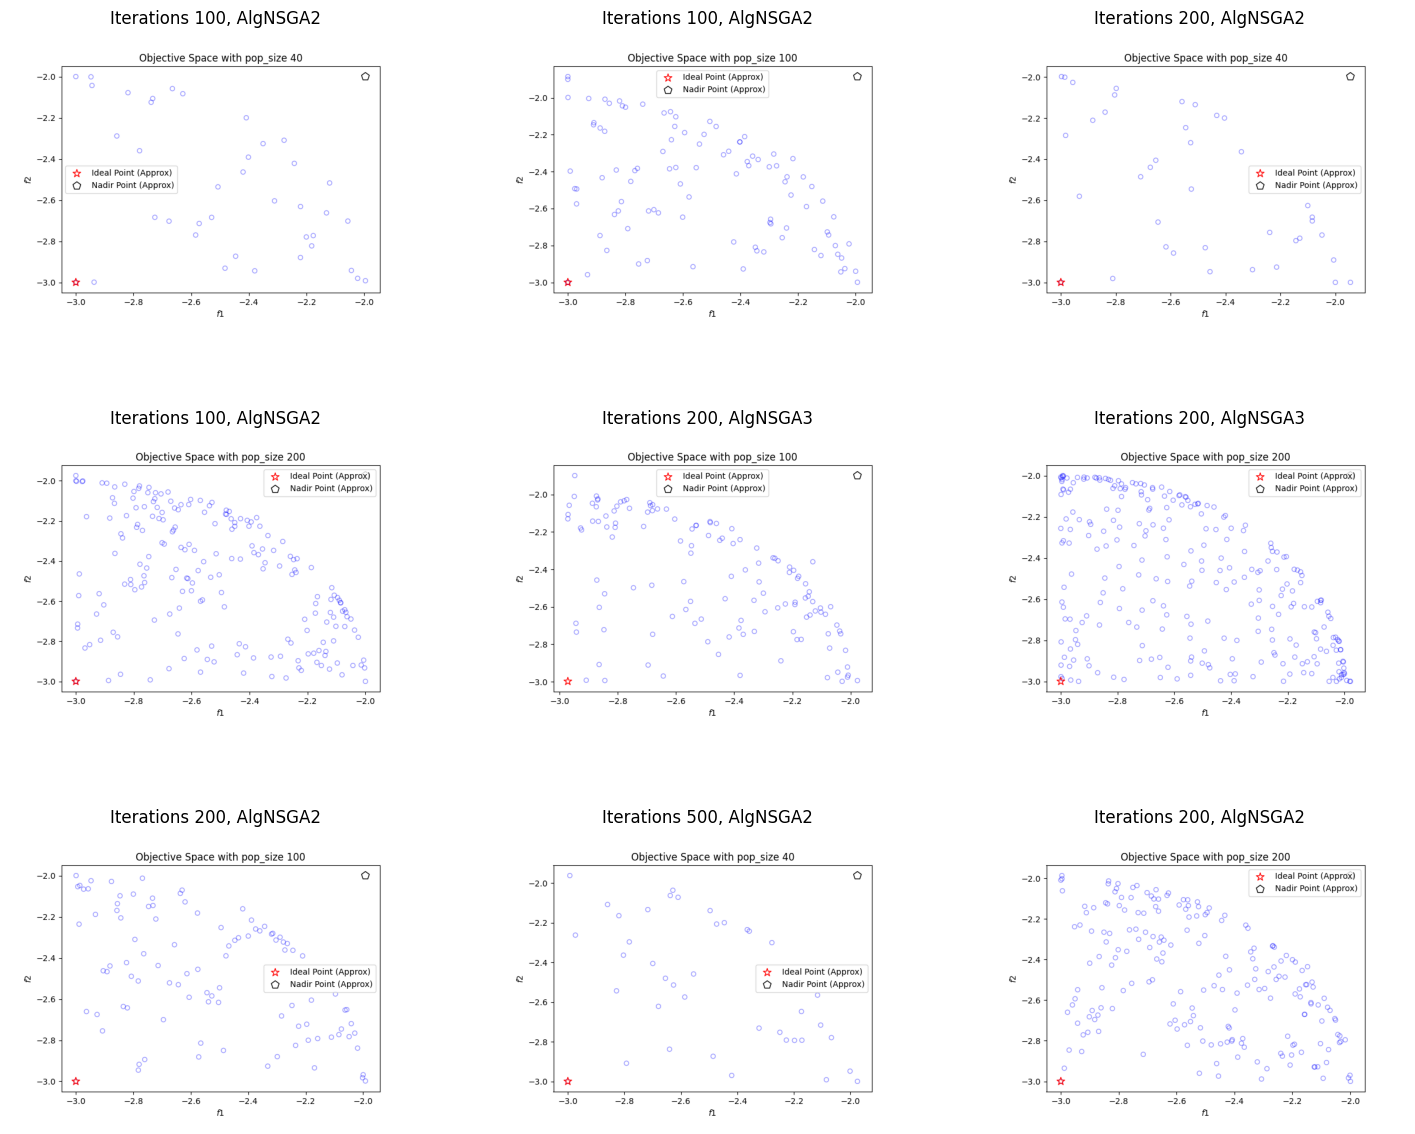

In [6]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = ltdz1['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {ltdz1.Iteration[i]}, Alg{ltdz1.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

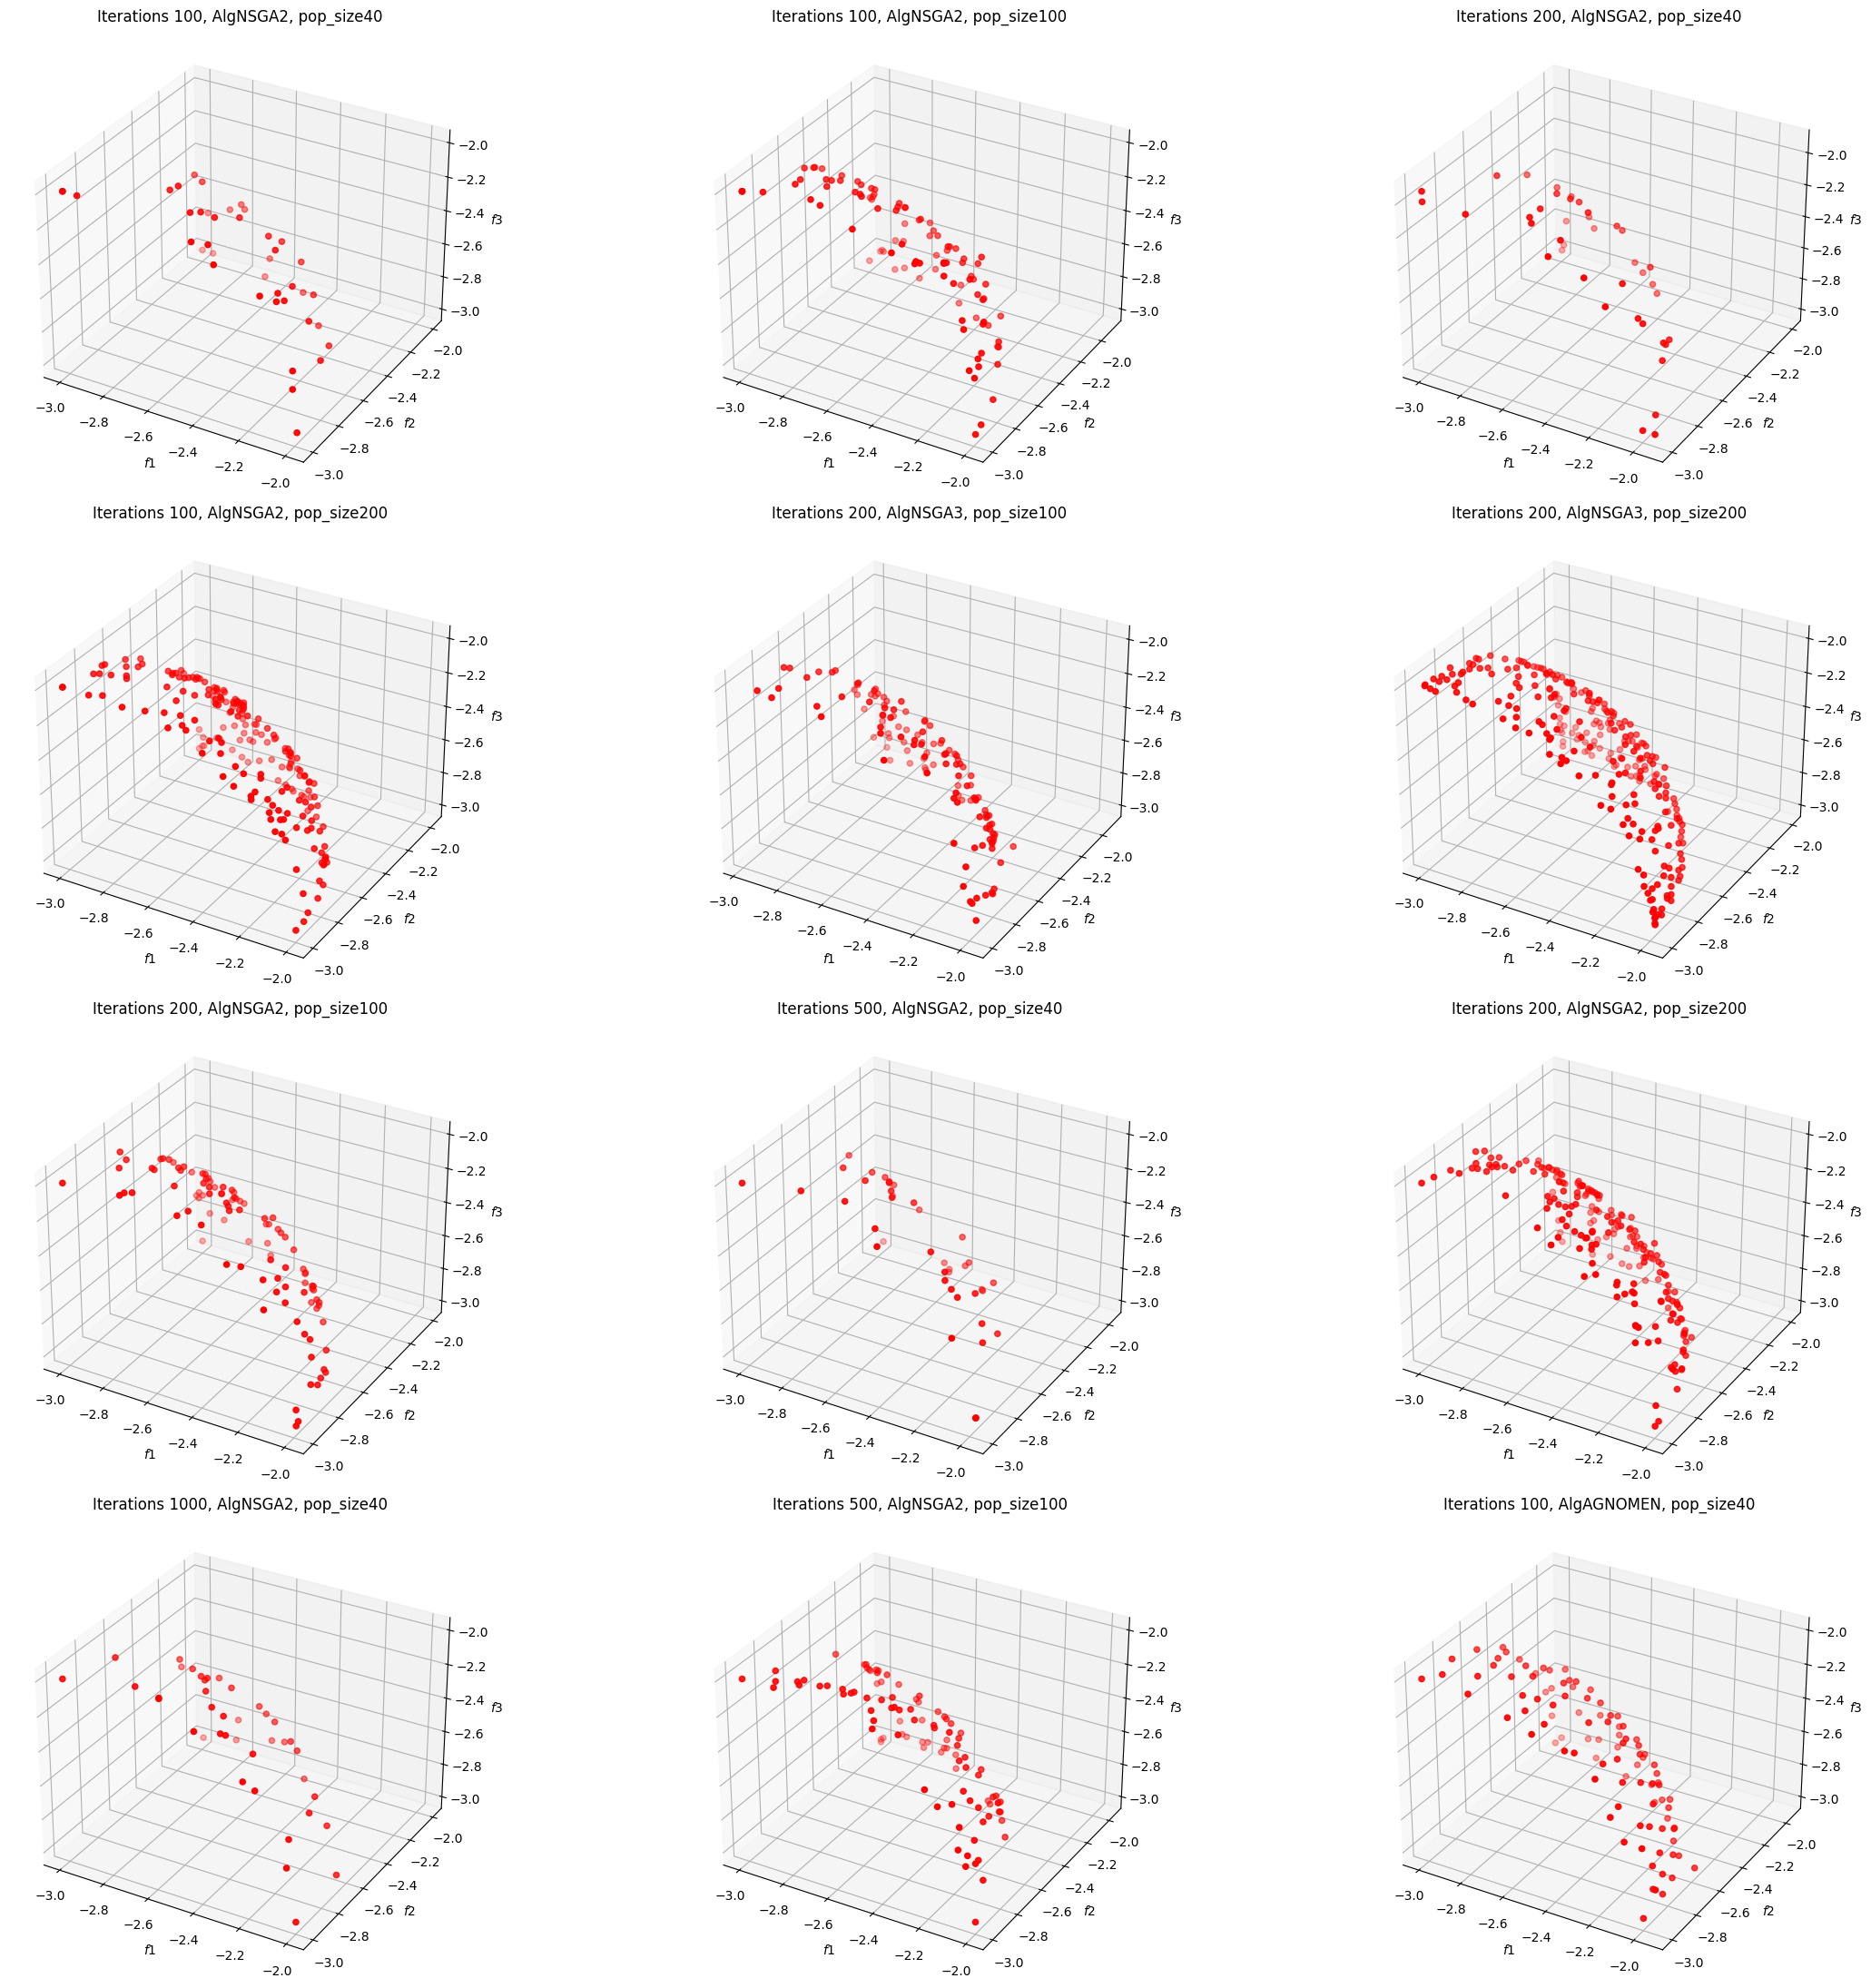

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(28,22), dpi=100)
for i in range(12):
    f = ltdz1['path'][i]
    path = os.path.join(folder,f )
    F = np.loadtxt(path)
    ax = fig.add_subplot(4, 3, i+1, projection='3d')
    ax.scatter(F[:,0], F[:,1], F[:,2], c='r', marker='o')
    ax.set_xlabel('$f1$')
    ax.set_ylabel('$f2$')
    ax.set_zlabel('$f3$')
    ax.set_title(f'Iterations {ltdz1.Iteration[i]}, Alg{ltdz1.Alg_name[i]}, pop_size{ltdz1.pop_size[i]}')
    plt.tight_layout()

In [8]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(ltdz1['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([-1.76, -1.76, -1.91])
pf = np.loadtxt(os.path.join(cdir, 'Bench/ldtz1_pf' ))
hv_result(ltdz1)

Global nadir point for kur1 with two variables is :[-1.76 -1.76 -1.91]
ref_point is [-1.76 -1.76 -1.91]
pf shape is (441, 3)


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,solutions_shape,exec_time,hv,igd_plus,hv_exc_time
0,LTDZ1,NSGA3,100000,500,3,3,200,250,12.3272471,1.1021042,0.0142145,0.0158460
1,LTDZ1,NSGA3,20000,100,3,3,200,250,2.3200562,1.1017264,0.0153176,0.0161841
2,LTDZ1,NSGA3,40000,200,3,3,200,270,5.2669606,1.1012962,0.0148622,0.0179250
3,LTDZ1,NSGA3,200000,1000,3,3,200,262,25.9870048,1.0985658,0.0154081,0.0171258
4,LTDZ1,AGNOMEN,100000,1000,3,3,40,100,43.6110764,1.0877682,0.0206501,0.0045459
5,LTDZ1,AGNOMEN,100000,1000,3,3,100,100,43.5933032,1.0877682,0.0206501,0.0040441
6,LTDZ1,AGNOMEN,100000,1000,3,3,200,100,46.3832786,1.0877682,0.0206501,0.0037122
7,LTDZ1,AGNOMEN,20000,200,3,3,200,100,8.0275464,1.0849681,0.0209148,0.0037310
8,LTDZ1,AGNOMEN,20000,200,3,3,100,100,8.0465314,1.0849681,0.0209148,0.0037799
9,LTDZ1,AGNOMEN,20000,200,3,3,40,100,8.0981750,1.0849681,0.0209148,0.0036809


In [9]:
ref_point = np.array([5, 5, 5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/ldtz1_pf' ))
hv_result(ltdz1)

ref_point is [5 5 5]
pf shape is (441, 3)


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,solutions_shape,exec_time,hv,igd_plus,hv_exc_time
0,LTDZ1,AGNOMEN,100000,1000,3,3,40,100,43.6110764,511.4117839,0.0206501,0.0037749
1,LTDZ1,AGNOMEN,100000,1000,3,3,100,100,43.5933032,511.4117839,0.0206501,0.0037479
2,LTDZ1,AGNOMEN,100000,1000,3,3,200,100,46.3832786,511.4117839,0.0206501,0.0036769
3,LTDZ1,AGNOMEN,20000,200,3,3,200,100,8.0275464,511.4089807,0.0209148,0.0040991
4,LTDZ1,AGNOMEN,20000,200,3,3,100,100,8.0465314,511.4089807,0.0209148,0.0039511
5,LTDZ1,AGNOMEN,20000,200,3,3,40,100,8.0981750,511.4089807,0.0209148,0.0040619
6,LTDZ1,AGNOMEN,50000,500,3,3,200,100,21.0794044,511.4088417,0.0221626,0.0041018
7,LTDZ1,AGNOMEN,50000,500,3,3,40,100,20.9537613,511.4088417,0.0221626,0.0041058
8,LTDZ1,AGNOMEN,50000,500,3,3,100,100,20.6956677,511.4088417,0.0221626,0.0037482
9,LTDZ1,NSGA2,20000,100,3,3,200,200,1.8166876,511.4037155,0.0221305,0.0118902


## LTDZ1 reference 0,0,0. Also compute IDG with respect to the front attached  zdt10_9p.txt

In [10]:
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt10_9P' ))
print(pf.shape)

(60, 3)


Text(0.5, 0.92, 'Paretofront')

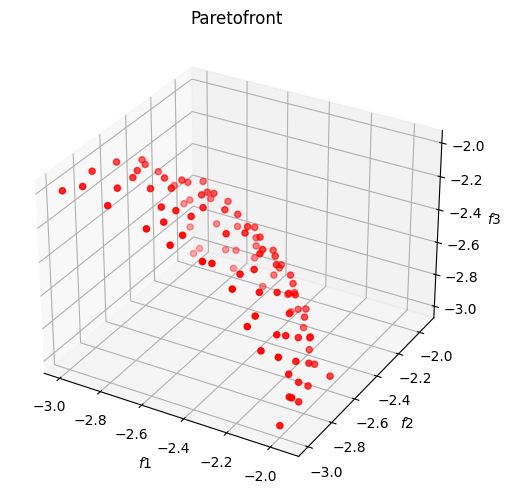

In [11]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = fig.add_subplot(projection='3d')
ax.scatter(F[:,0], F[:,1], F[:,2], c='r', marker='o')
ax.set_xlabel('$f1$')
ax.set_ylabel('$f2$')
ax.set_zlabel('$f3$')
ax.set_title(f'Paretofront')

In [12]:
ref_point = np.array([0, 0, 0])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt10_9P' ))
hv_result(ltdz1)

ref_point is [0 0 0]
pf shape is (60, 3)


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,solutions_shape,exec_time,hv,igd_plus,hv_exc_time
0,LTDZ1,AGNOMEN,100000,1000,3,3,40,100,43.6110764,26.4117841,0.4120868,0.0035009
1,LTDZ1,AGNOMEN,100000,1000,3,3,100,100,43.5933032,26.4117841,0.4120868,0.0034389
2,LTDZ1,AGNOMEN,100000,1000,3,3,200,100,46.3832786,26.4117841,0.4120868,0.0034821
3,LTDZ1,AGNOMEN,20000,200,3,3,200,100,8.0275464,26.4089832,0.4117698,0.0034890
4,LTDZ1,AGNOMEN,20000,200,3,3,100,100,8.0465314,26.4089832,0.4117698,0.0034461
5,LTDZ1,AGNOMEN,20000,200,3,3,40,100,8.0981750,26.4089832,0.4117698,0.0036080
6,LTDZ1,AGNOMEN,50000,500,3,3,200,100,21.0794044,26.4088417,0.4119133,0.0034852
7,LTDZ1,AGNOMEN,50000,500,3,3,40,100,20.9537613,26.4088417,0.4119133,0.0034370
8,LTDZ1,AGNOMEN,50000,500,3,3,100,100,20.6956677,26.4088417,0.4119133,0.0034091
9,LTDZ1,NSGA3,40000,200,3,3,200,270,5.2669606,26.4086968,0.4124101,0.0212166
